# InternLM 实战营第二期笔记01  

**书生·浦语大模型全链路开源体系+InternLM2技术报告**

本次课程链接在GitHub上: https://github.com/imChenx/InternLM

第一次课程录播链接: https://www.bilibili.com/video/BV1Vx421X72D/?vd_source=39aa961652f56a2108d0e044c3c8f710

InternLM2技术报告: arxiv.org/pdf/2403.17297.pdf

## 一、第一次课程笔记

2024年1月，上海 AI Lab正式发布书生 · 浦语 2.0（InternLM2），包括1.8B、7B 及 20B 两种参数规格及Base、Chat等多个版本

**InternLM2_Base**：高质量、强可塑性的基座模型

**InternLM2**：在Base基础上，在多个能力进行了强化，更优秀的基座模型

**Chat-SFT**：在Base基础上，经过有监督微调SFT后的对话模型

**InternLM2-Chat**：在Chat-SFT基础上，再经过RLHF对齐后的对话模型

**各个平台的开源地址**

GitHub：github.com/InternLM/InternLM

HuggingFace：huggingface.co/internlm

ModelScope：modelscope.cn/organization/Shanghai_AI_Laboratory

OpenXLab：openxlab.org.cn/models/InternLM

**回归语言建模的本质**

众所周知，数据质量目前是对于LLM性能提升的最重要的因素。InternLM2 的核心理念在于**回归语言建模的本质**，通过提高语料质量及信息密度，实现base model在语言建模能力上的质的提升

开源数据集平台OpenDataLab：[OpenDataLab](https://opendatalab.com/)

![](img/img-20240412094745.png)

**主要亮点**

相比较于1代的InternLM，2代的InterLM2实现了全方位的性能提升（吊打）

1. 20w上下文，
2. 推理数学代码能力提升，
3. 结构化创作
4. 工具调用能力
5. 内生计算、代码解释

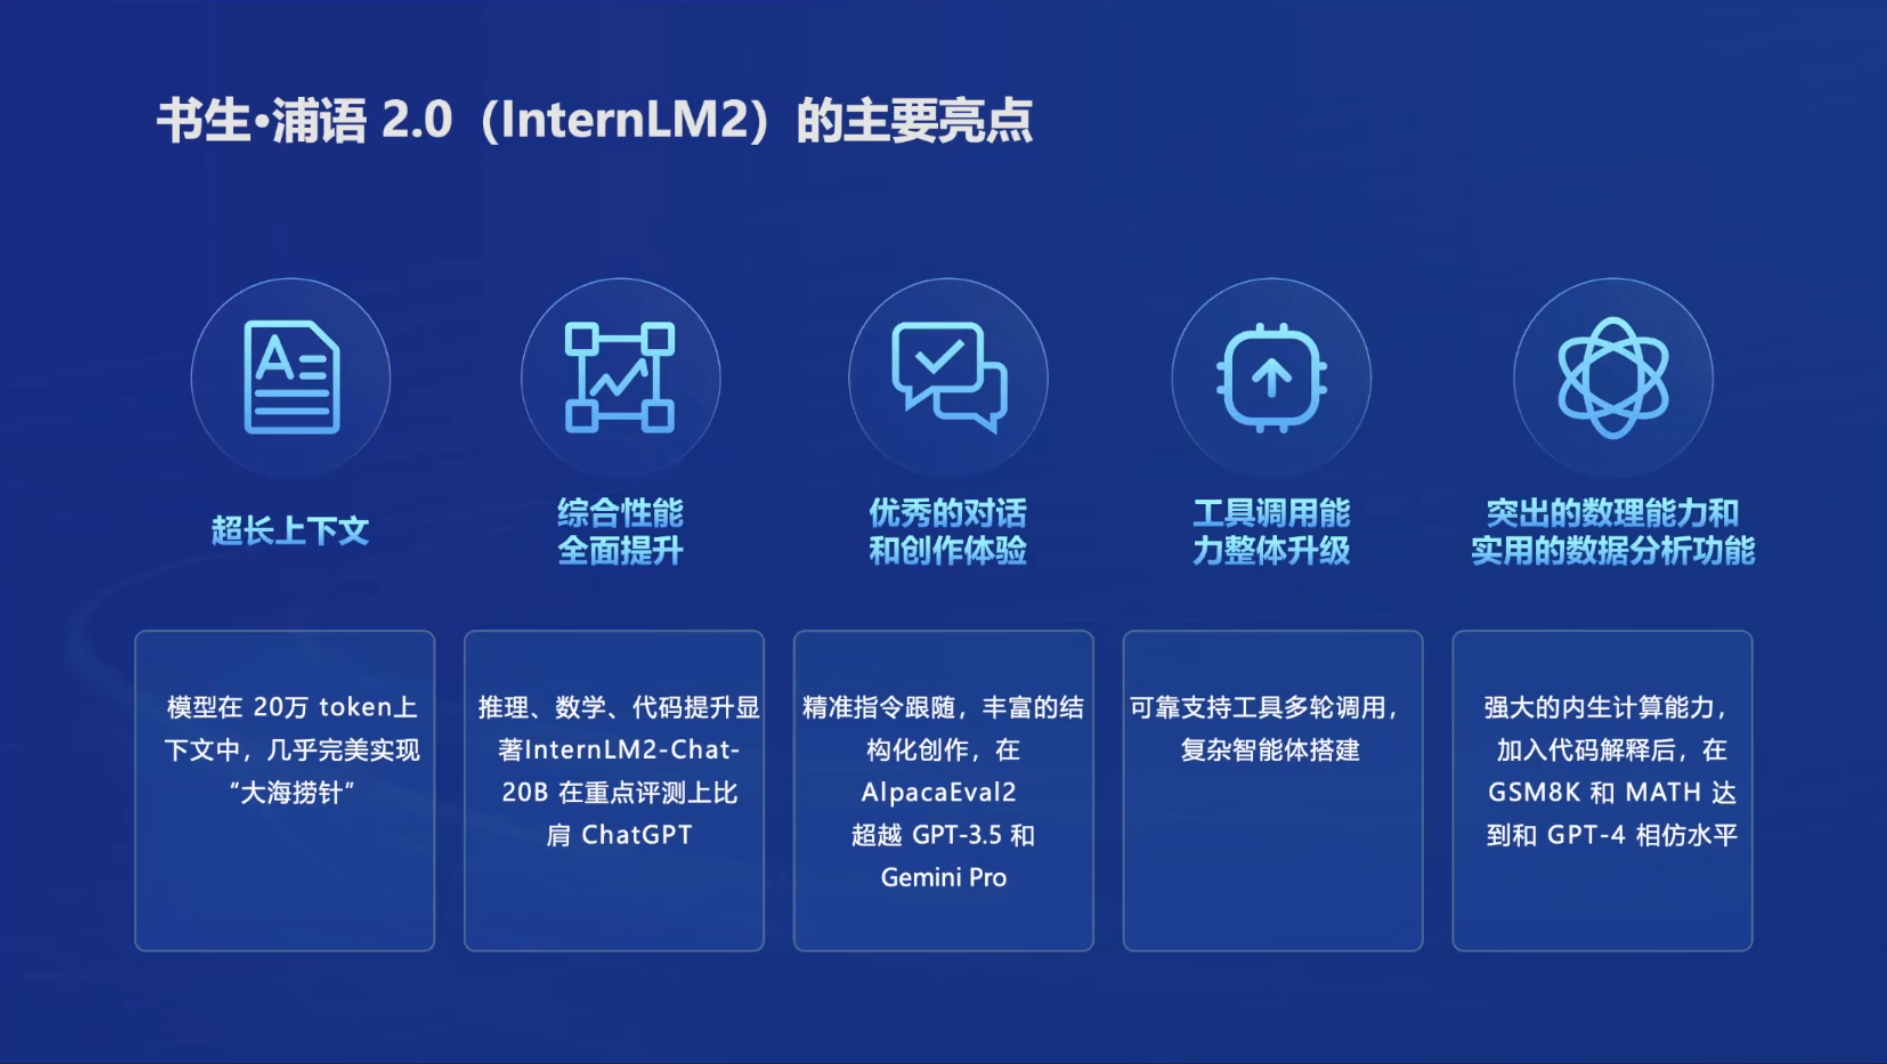

**性能全方位提升**

对于其他参数量类似的开源模型，基本是全方位的超越，特别是推理、数学、代码等方面的能力提升尤为显著

![](img/img-20240412094932.png)

除了上面的量化指标，还有人文关怀、想象力创作、工具调用能力等，都实现了提升

![](img/img-20240412094958.png)

**强大的计算能力**

这个比较有趣，InternLM2的数学计算能力已经很强了，在此基础上，再配合代码解释器，更上一层楼

比如对于难度更高的MATH数据集，借助代码解释器，精度从32.5大幅提高到51.2，甚至超过了GPT-4的表现

![](img/img-20240412094945.png)

除此之外，还有实用的数据分析：可以读表格，分析数据、绘制统计图表、调用机器学习算法等

**从模型到应用**

从现实场景中大模型应用的全流程，包括从 模型选型 到 模型部署，引出了：开源了什么环节？如何进行开源？

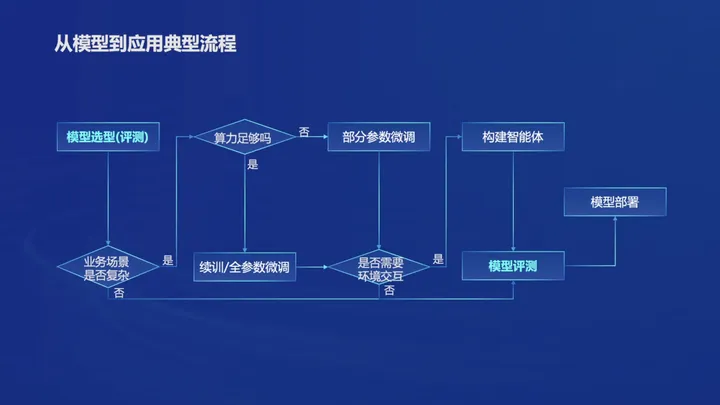

全方位全流程的开源，**数据-预训练-微调-部署-评测-应用**

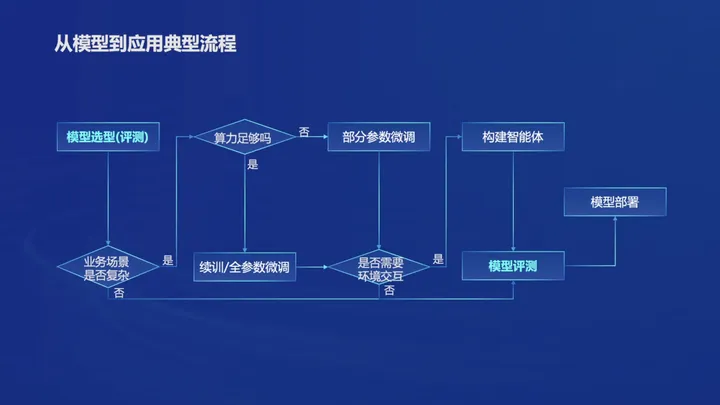

**书生浦语开放体系总览**

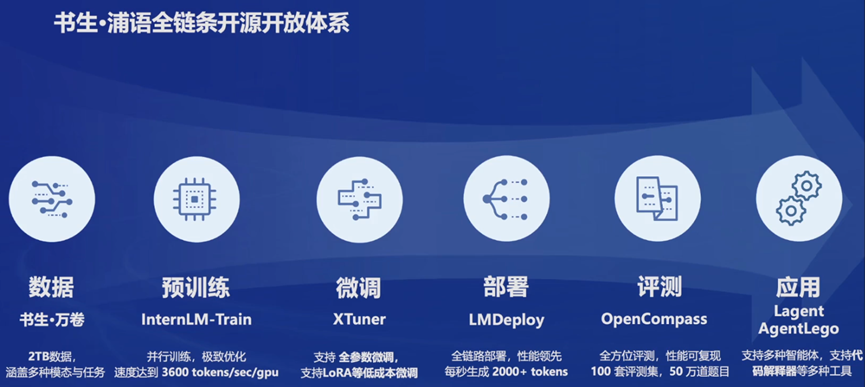

**微调**

开源的高效微调框架**XTuner**，一站式解决繁琐的步骤，比如：

支持多种任务（增量预训练, 指令微调）

支持多种输入数据的格式

支持优化加速（Flash Attention, DeepSpeed）

支持多种微调算法（LoRA, QLoRA, 全量微调）

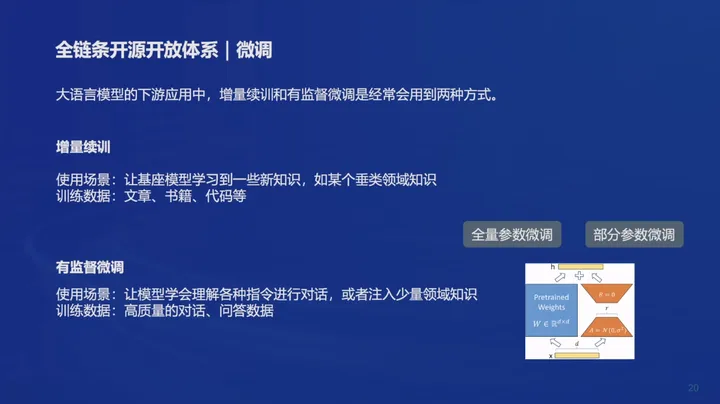

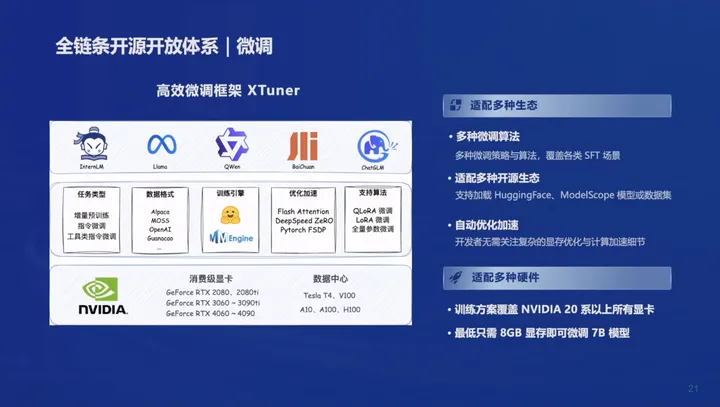

**Agent**

另外对于Agent方向，开源提供了**Lagent**（应该类似于字节的coze和百度的灵境）和工具箱**AgentLego**。

智能体工具箱和框架本身做了解耦，让开发者可以聚焦于Agent本身

本人对Agent方向较为感兴趣，希望能够参与这方面的研究工作

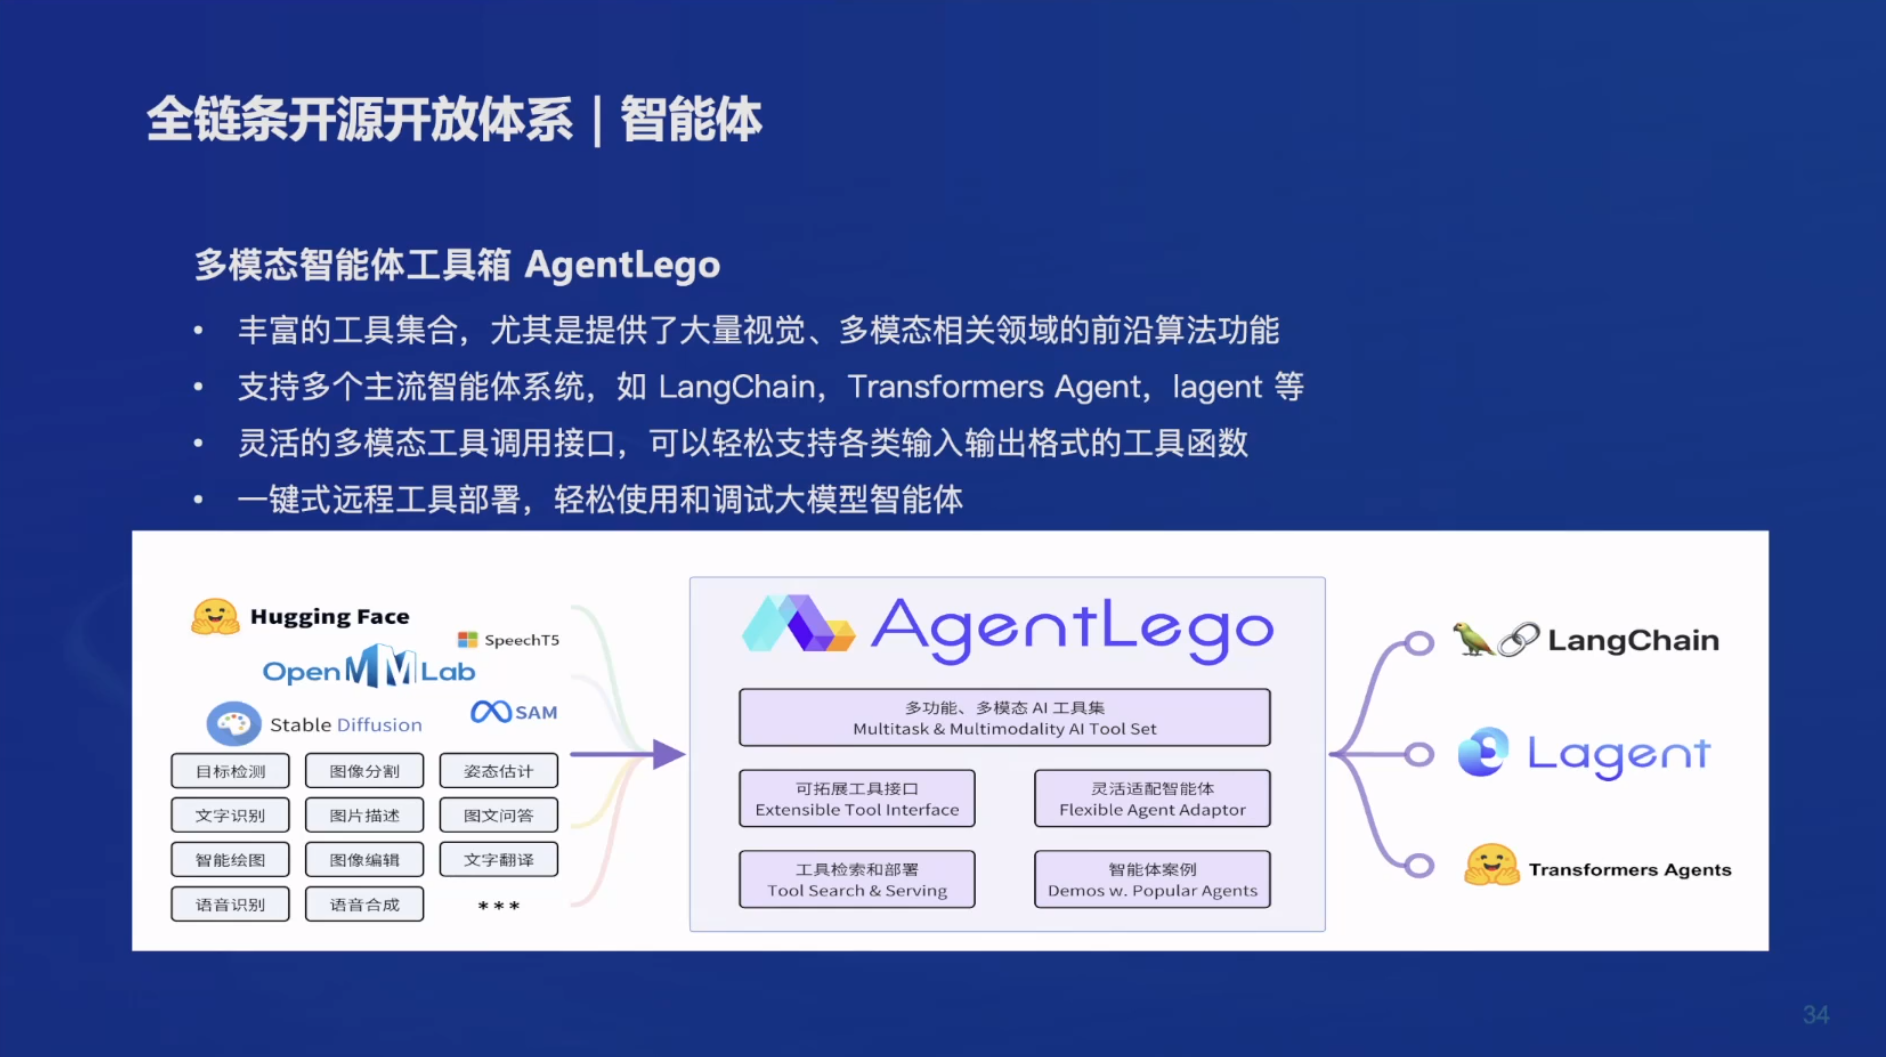

## 二、InternLM2技术报告笔记

[InternLM2技术报告](arxiv.org/pdf/2403.17297.pdf)

### **摘要关键点：**

文章介绍了InternLM2，这是一个开源的大型语言模型（LLM），在6个维度和30个基准测试中展示了优异的性能。

InternLM2通过创新的预训练框架（InternEVO）和优化技术，提高了长文本建模的能力和对人类偏好的适应性。

模型经过了细致的预训练过程，包括对文本、代码和长文本数据的处理。

InternLM2还采用了**监督式微调（SFT）**和**条件在线强化学习（COOL RLHF）策略**，以解决人类偏好的冲突和奖励黑客问题。

文章还提供了不同训练阶段和模型大小的InternLM2模型，以便社区可以洞察模型的演变。

### 主要贡献

**1. 公开发布InternLM2**：

开源了不同规模的模型（包括18亿、70亿和200亿参数），它们在主观和客观评估中都表现出色。此外，发布了不同阶段的模型，以便社区分析SFT和RLHF训练后的变化。

**2. 设计具有200k上下文窗口**：

InternLM2在长序列任务中表现出色，在大海捞针实验中使用200k上下文几乎完美地识别出所有”针”。此外，分享了在所有阶段（预训练、SFT和RLHF)训练长序列语言模型的经验。

**3. 全面的数据准备指南**：

详细阐述了数据准备，包括预训练数据、领域特定增强数据、SFT数据和RLHF数据。这些详细内容将有助于社区更好地训练LLMs。

**4. 创新的RLHF训练技术**：

引入了条件在线RLHF（COOL RLHF），以协调不同的偏好，显著提高了InternLM2在各种主观对话评估中的性能。还进行了初步的主观和客观RLHF结果的分析和比较，为社区提供了RLHF的深入理解。）

### 模型架构

总体遵循**LLaMA**的结构设计原则，沿用了RMSNorm和SwiGLU激活函数，除此之外

1. 对模型中的权重矩阵如Wk, Wq, Wv进行了调整，以支持不同的张量并行转换，并提高训练速度。

2. 为了支持长上下文，采用了分组查询注意力 (GQA)结构，以便在处理非常长的上下文时保持高速和低GPU显存消耗。

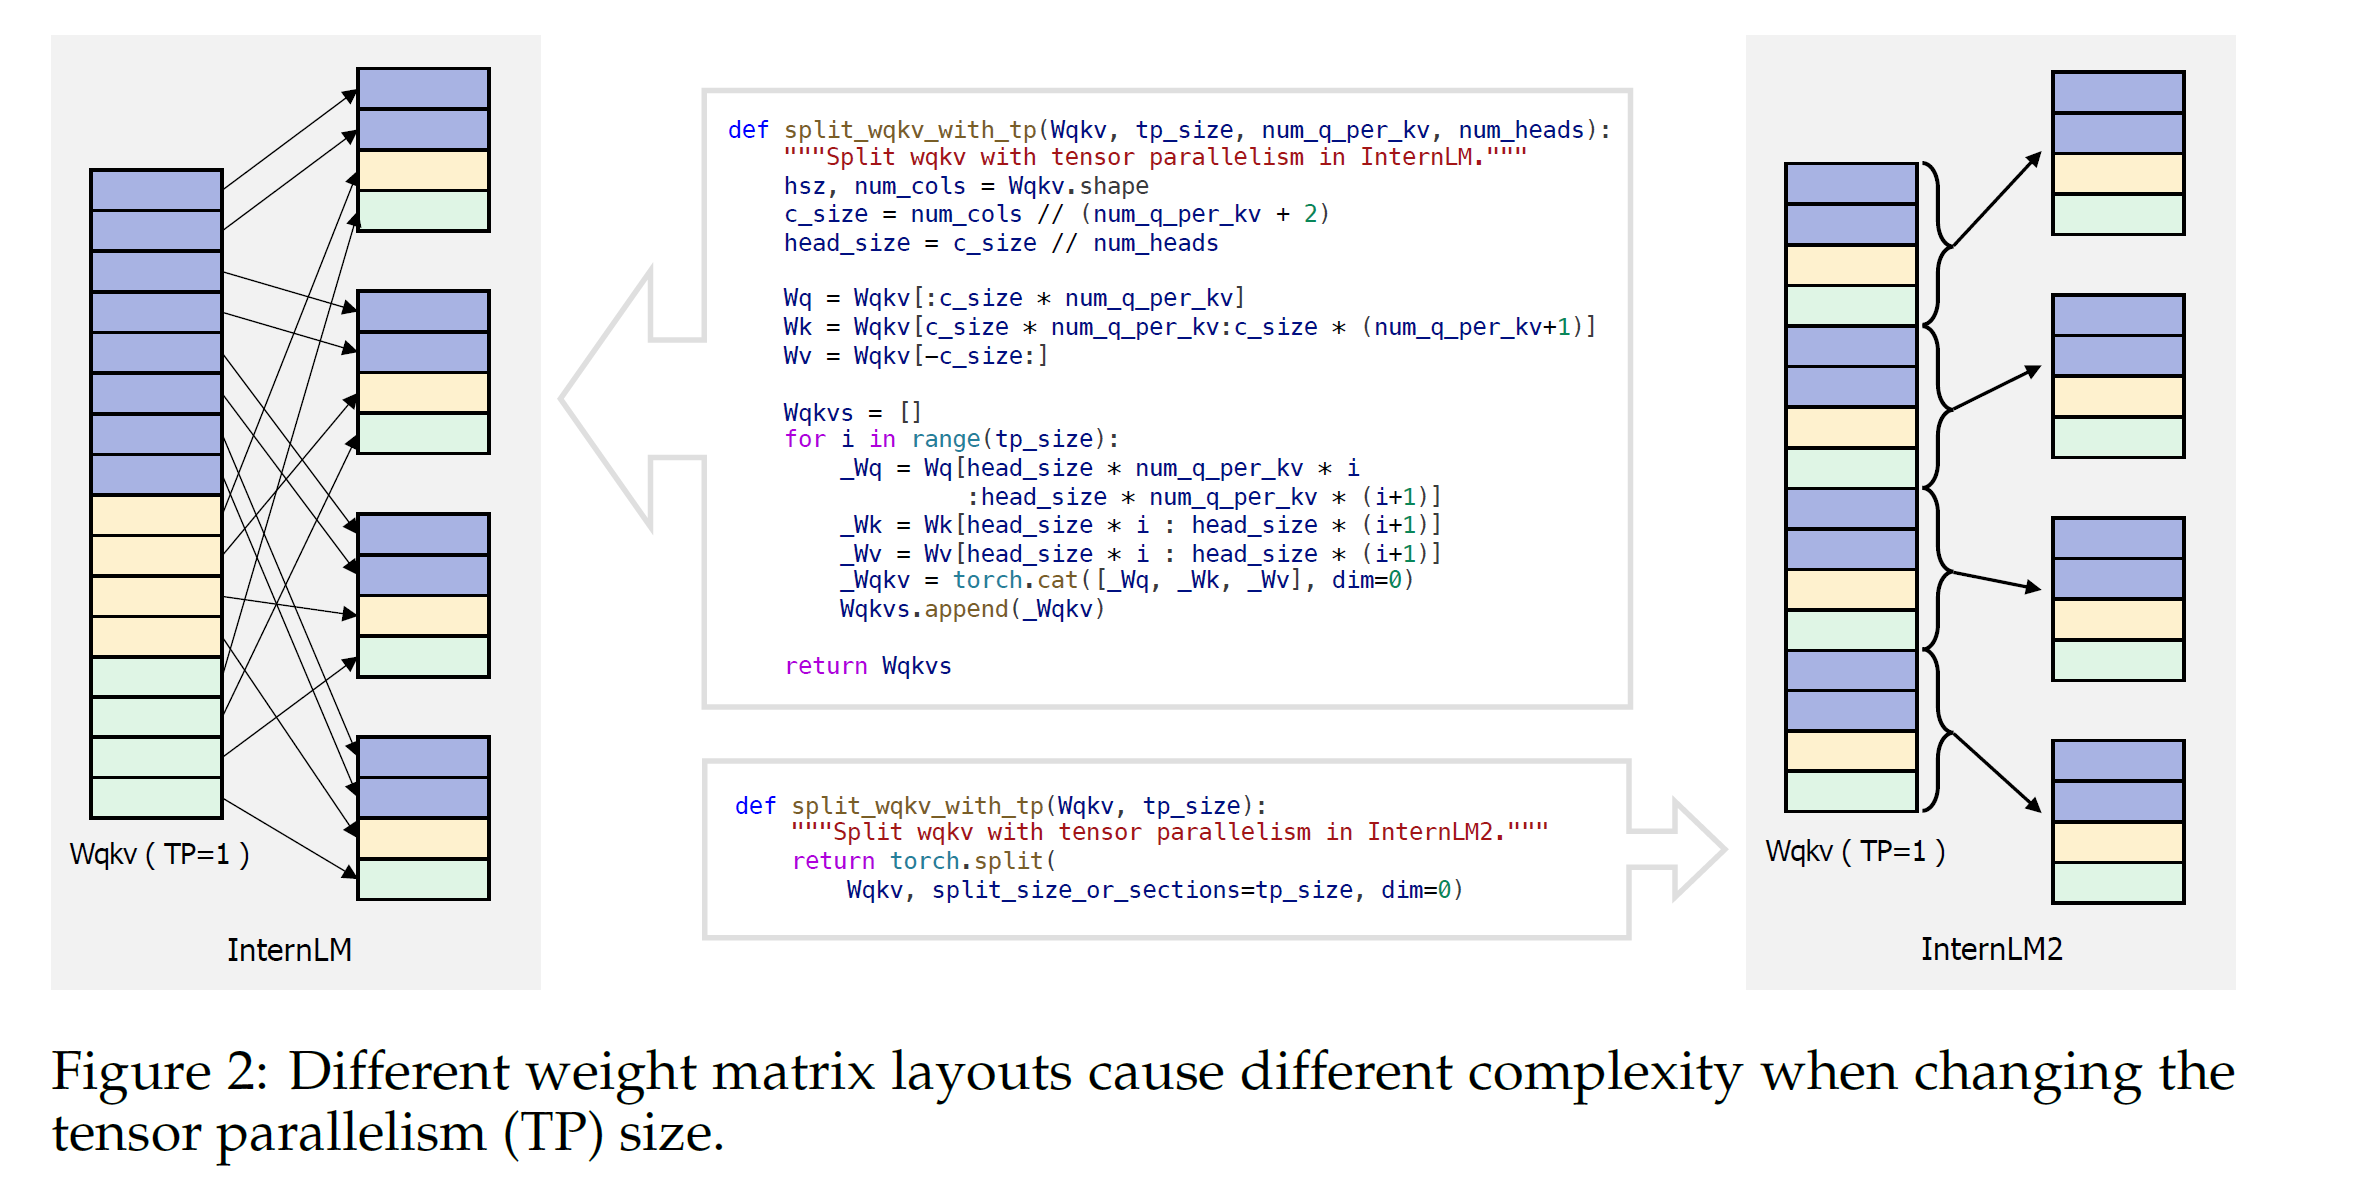

### 预训练数据

预训练数据包括文本数据、代码数据、超长上下文数据

文本数据预处理流程：jsonl格式化 --> 去重 --> 去乱码 --> 去有害 --> 去广告 --> 去低质

代码数据预处理流程：md格式化 --> 去重 --> 去低质 --> 依赖排序

超长上下文数据预处理：长文本选择 --> 统计过滤 --> 上下文关联性过滤

### 预训练阶段

1. 4k长度的预训练语料库，有助于模型掌握基本的文本理解和生成能力
2. 32k长度的预训练语料库，提高对长期依赖关系的捕捉能力
3. 能力特定增强训练，如编程、推理和考试等，进一步提升了模型在这些领域的性能

### 对齐阶段

**Supervised Fine-Tuning**

使用了一个包含1000万条指令数据实例的dataset，确保其有用性和无害性。

包括一般对话、自然语言处理任务、数学问题、代码生成和函数调用等。为了实现对各种任务的灵活表示，将数据样本转换为 ChatML 格式(Cha)。

7B和20B模型分别使用AdamW优化器，初始学习率为4e-5，进行了一个epoch的训练。

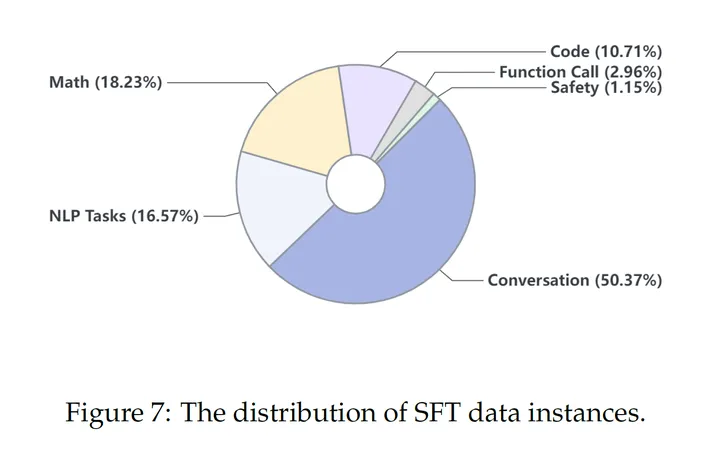

**Conditional Online RLHF**

和传统的RLHF相比，主要有两点改进：

**1. 条件奖励模型**：该模型能够根据不同的上下文条件、提示词调整其关注的偏好，解决不同任务和场景下的偏好冲突。例如，在开发对话系统时，我们期望它提供有用的信息（有益）同时避免产生有害或不适当的内容（无害）。然而，实践中这两个偏好往往难以同时满足，因为提供有用信息可能在某些情况下涉及敏感或高风险的内容。

**2.多轮在线RLHF策略**：使模型能够快速适应新的人类反馈，减少模型的“reward hacking”行为。例如，当模型规模增大，策略变得更强大时，模型可能会通过捷径来获取高分，而不是真正学习期望的行为。这导致模型以非预期的方式最大化奖励，严重影响语言模型的有效性和可靠性。

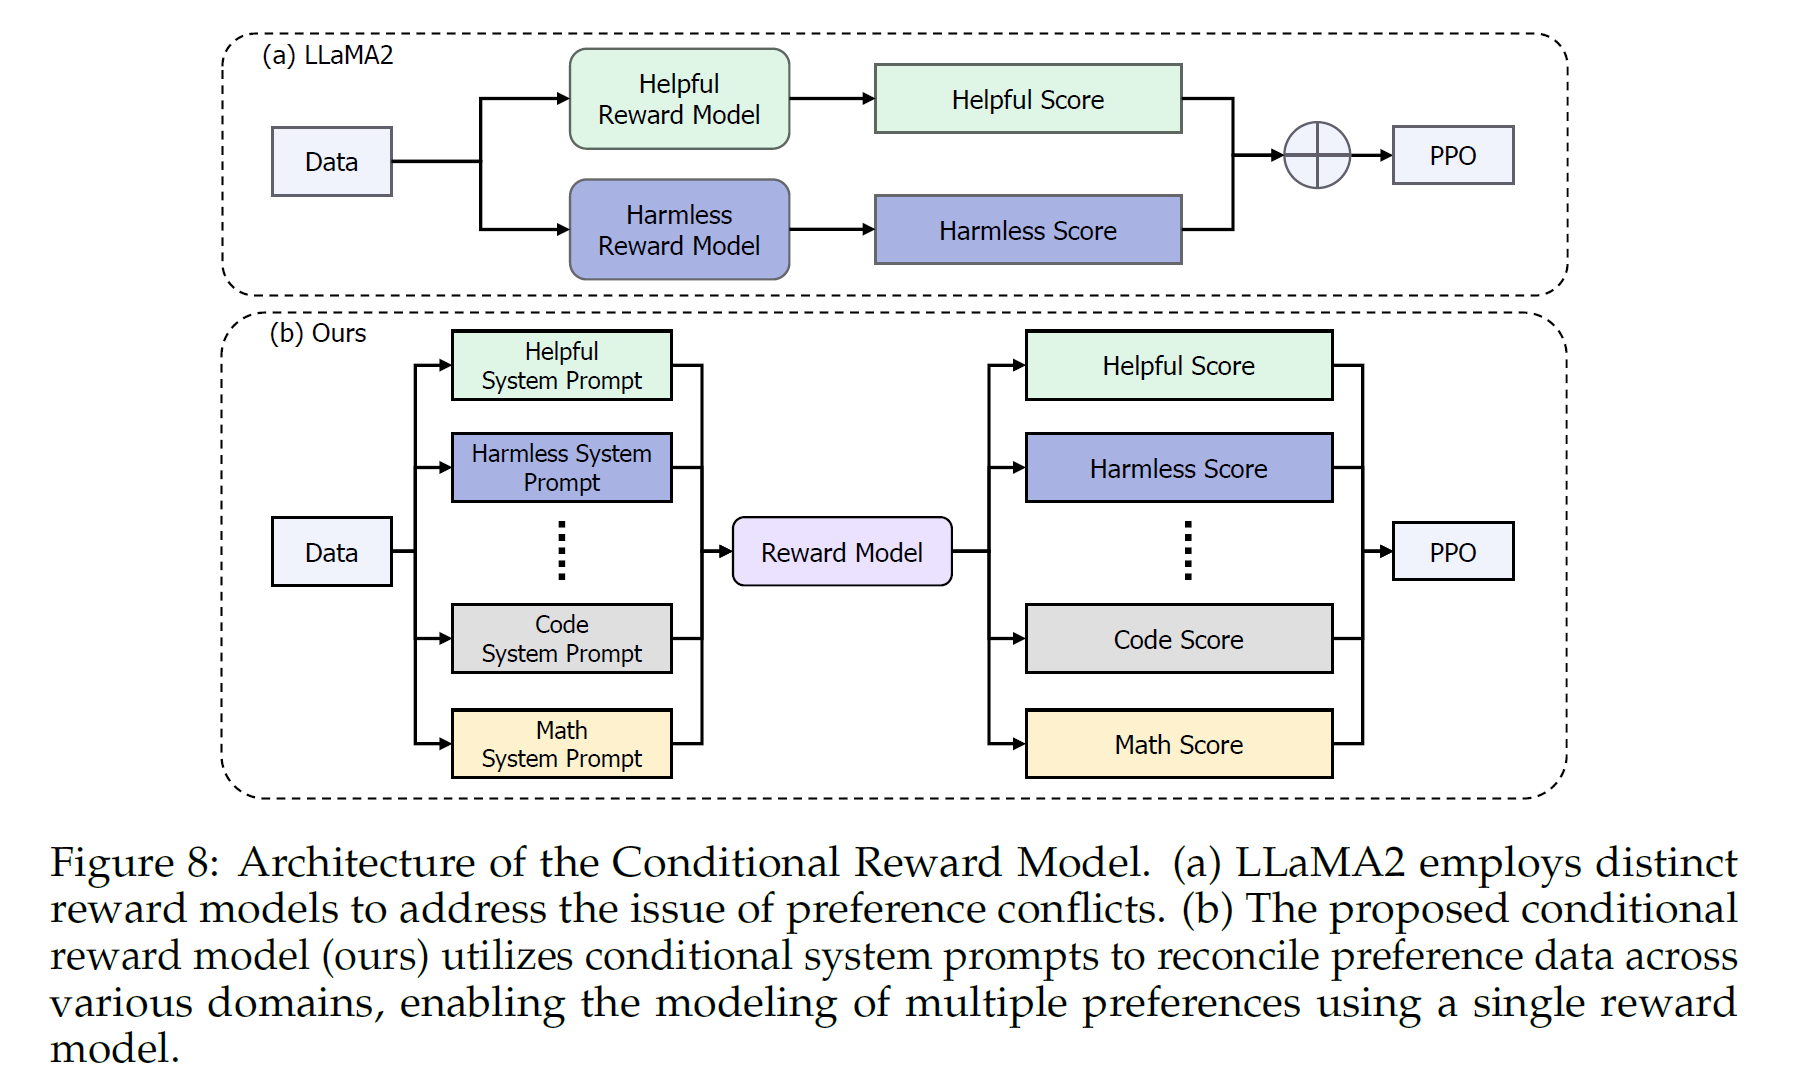

COOL RLHF的奖励模型需要经过PPO训练，以便能够理解各种反馈，并将其转化为奖励信号

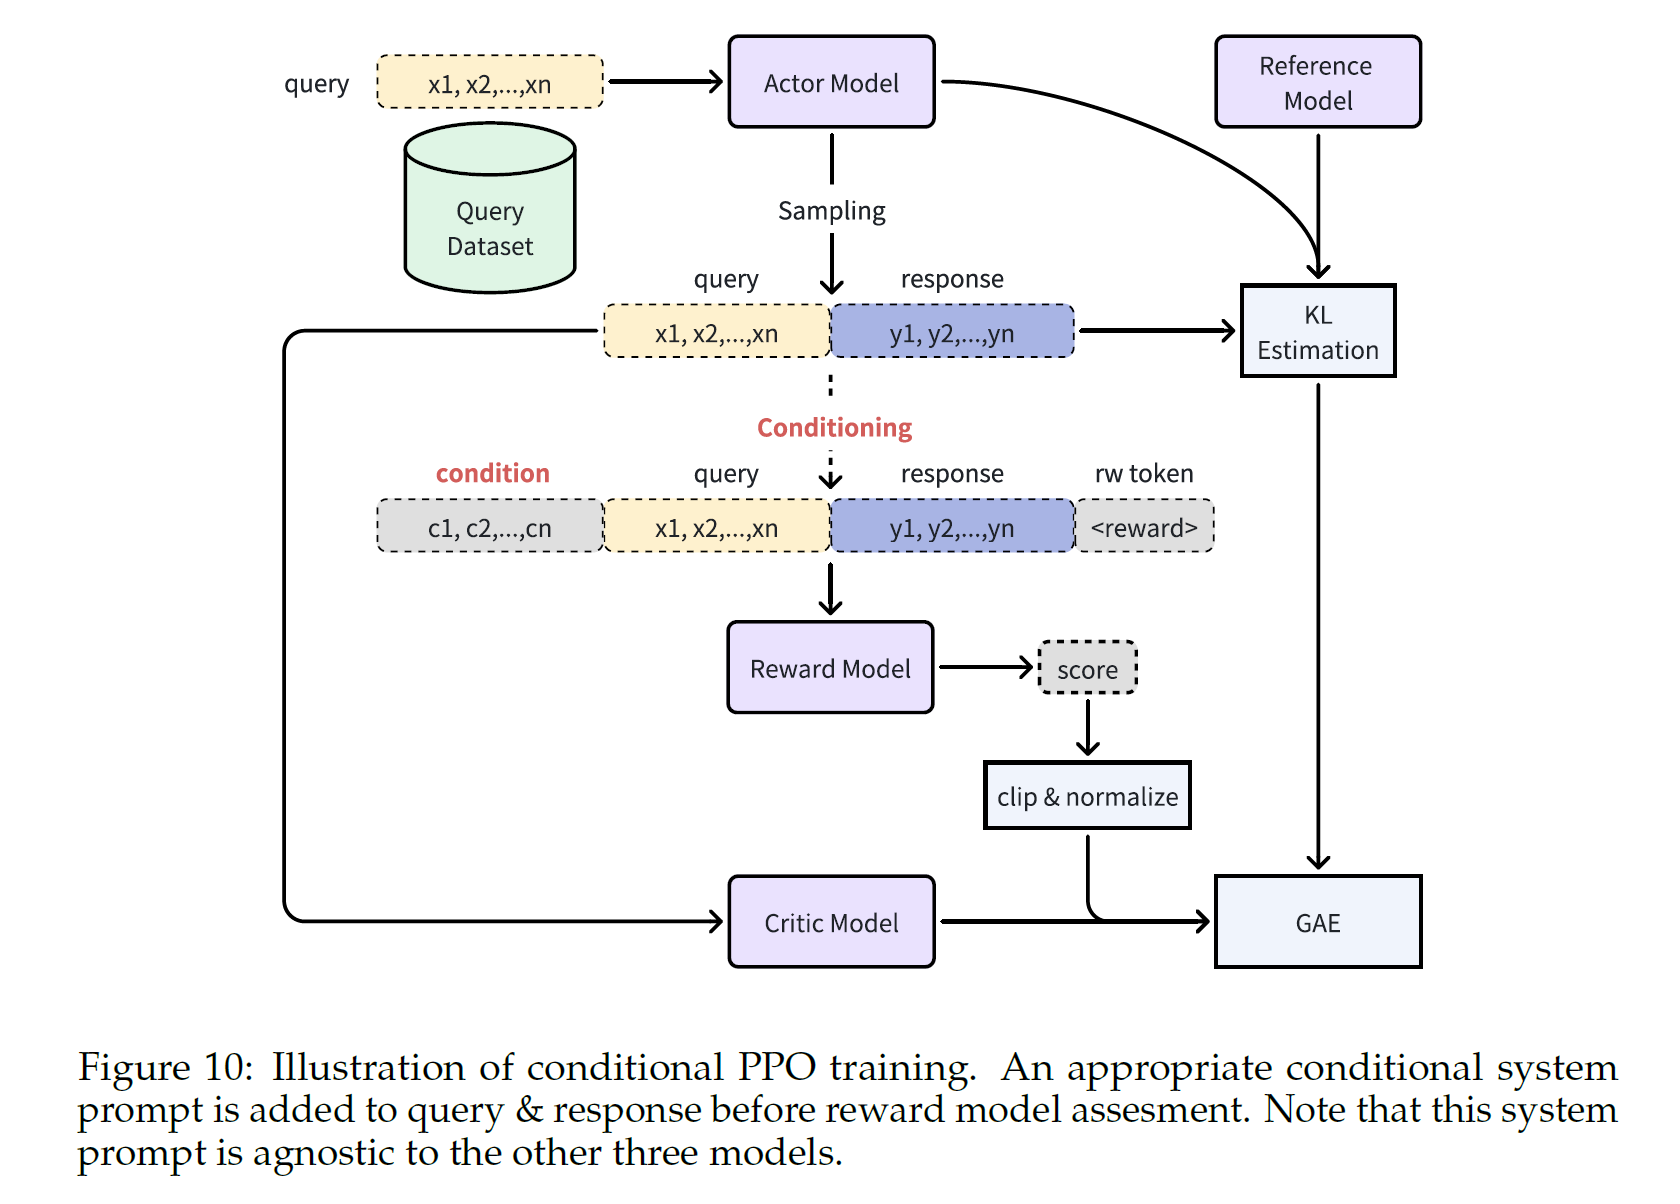

**Long-Context Finetuning**

为了保持大模型的长文本理解能力，依然使用了长文本（32k）来做SFT和RLHF

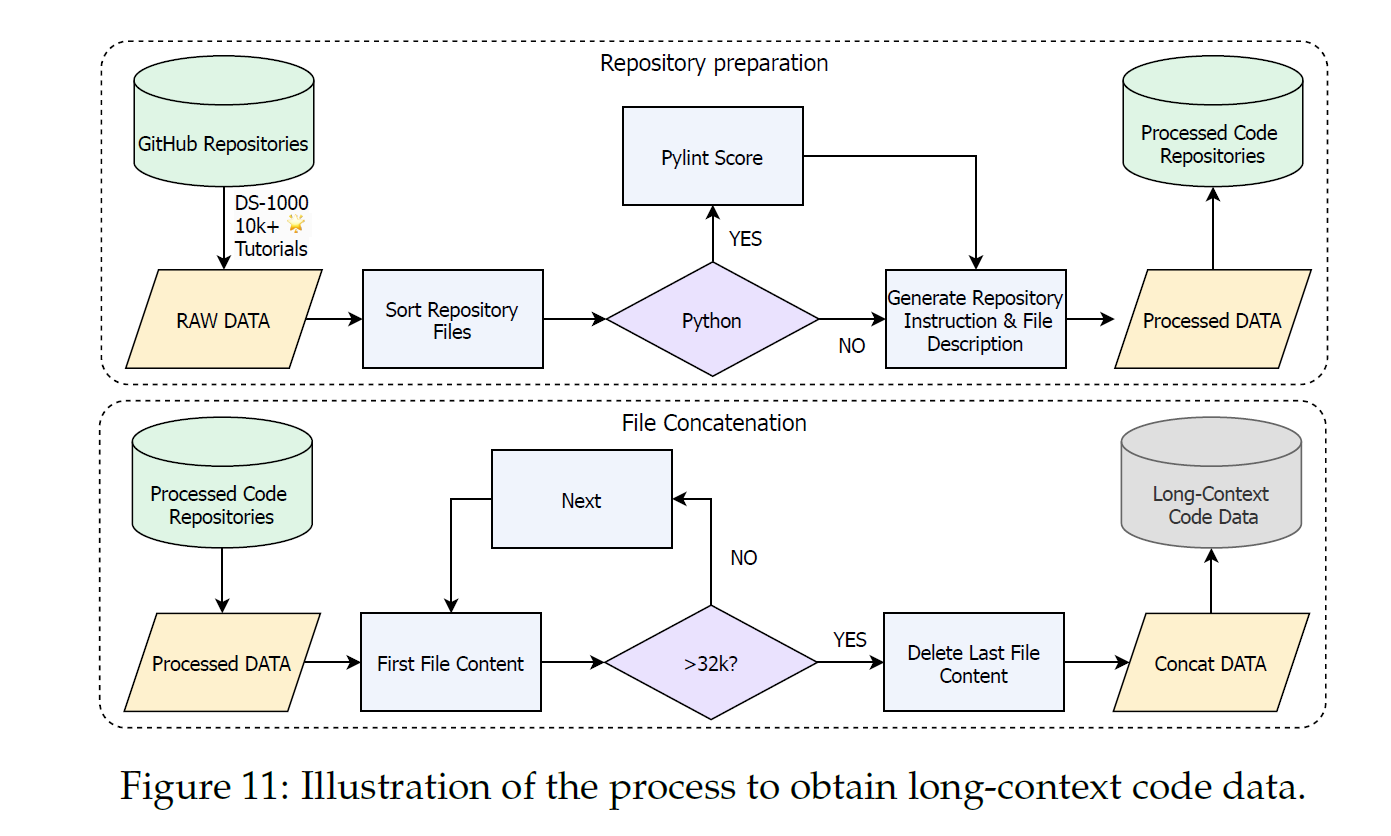

**Tool-Augmented LLMs**

采用经过修改的ChatML格式，通过引入“环境”角色，以支持通用工具的调用。定义了两个特殊关键字，即代码解释器(<|interpreter|>)和外部插件(<|plugin|>)，以支持agent的多样化用途。采用一种统一的流式格式，处理各种类型的插件扩展和AI环境，同时保持与普通聊天的兼容性。

### 总结

InternLM2是一个开源的大型语言模型，通过创新的预训练技术和对齐策略，在多个维度和基准测试中展现了卓越的性能。

模型特别关注长文本的处理能力，并通过细致的数据准备和优化技术，提高了与人类偏好的一致性。

> 参考文献：https://zhuanlan.zhihu.com/p/689392145